In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle



In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

In [4]:
df1 = pd.read_pickle('orig_final.pkl')
type(df1)

pandas.core.frame.DataFrame

In [11]:
len(df1)

13373841

In [ ]:
df2=

In [5]:
pd.set_option('display.max_columns',30)
df1.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,...,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,NA,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,...,SF,53100.0,F117Q2000001,C,240,2.0,Other sellers,"PNCBANK,NATL",None,,,,0,0,0
1,794.0,201708,NA,204707,43580.0,0.0,1.0,I,73.0,44.0,80000.0,73.0,5.0,R,N,...,SF,51000.0,F117Q2000002,C,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
2,806.0,201708,NA,204707,NaN,0.0,1.0,P,48.0,42.0,63000.0,48.0,4.0,R,N,...,SF,67900.0,F117Q2000003,N,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
3,751.0,201707,NA,203206,33460.0,0.0,1.0,P,80.0,16.0,424000.0,80.0,3.0,R,N,...,SF,55000.0,F117Q2000004,C,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
4,751.0,201707,NA,203206,33460.0,0.0,1.0,I,75.0,15.0,100000.0,75.0,4.0,R,N,...,CO,55100.0,F117Q2000005,N,180,2.0,Other sellers,Other servicers,None,,,,0,0,0


In [6]:
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,borrower_cnt
count,1.337384e+07,1.171890e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337383e+07,1.337384e+07
mean,7.559377e+02,3.030377e+04,4.277569e+00,1.027055e+00,7.105877e+01,3.302382e+01,2.216203e+05,7.018288e+01,4.404127e+00,5.420319e+04,1.562245e+00
std,4.374978e+01,1.131092e+04,9.796868e+00,2.196212e-01,1.708344e+01,1.043458e+01,1.195769e+05,1.722752e+01,8.675285e-01,3.011585e+04,4.962483e-01
min,3.000000e+02,1.018000e+04,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,5.000000e+03,6.000000e+00,2.000000e+00,6.000000e+02,0.000000e+00
25%,7.270000e+02,1.912400e+04,0.000000e+00,1.000000e+00,6.100000e+01,2.500000e+01,1.300000e+05,6.000000e+01,4.000000e+00,2.930000e+04,1.000000e+00
50%,7.660000e+02,3.170000e+04,0.000000e+00,1.000000e+00,7.500000e+01,3.400000e+01,1.980000e+05,7.500000e+01,4.000000e+00,5.420000e+04,2.000000e+00
75%,7.910000e+02,4.014000e+04,0.000000e+00,1.000000e+00,8.000000e+01,4.100000e+01,2.960000e+05,8.000000e+01,5.000000e+00,8.370000e+04,2.000000e+00
max,8.500000e+02,4.974000e+04,5.500000e+01,4.000000e+00,2.120000e+02,6.500000e+01,1.470000e+06,1.050000e+02,1.100000e+01,9.990000e+04,2.000000e+00


In [7]:
pd.options.display.float_format = '{:.2f}'.format
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,borrower_cnt
count,13373841.00,11718896.00,13373841.00,13373841.00,13373841.00,13373841.00,13373841.00,13373841.00,13373841.00,13373827.00,13373841.00
mean,755.94,30303.77,4.28,1.03,71.06,33.02,221620.26,70.18,4.40,54203.19,1.56
std,43.75,11310.92,9.80,0.22,17.08,10.43,119576.86,17.23,0.87,30115.85,0.50
min,300.00,10180.00,0.00,0.00,6.00,1.00,5000.00,6.00,2.00,600.00,0.00
25%,727.00,19124.00,0.00,1.00,61.00,25.00,130000.00,60.00,4.00,29300.00,1.00
50%,766.00,31700.00,0.00,1.00,75.00,34.00,198000.00,75.00,4.00,54200.00,2.00
75%,791.00,40140.00,0.00,1.00,80.00,41.00,296000.00,80.00,5.00,83700.00,2.00
max,850.00,49740.00,55.00,4.00,212.00,65.00,1470000.00,105.00,11.00,99900.00,2.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


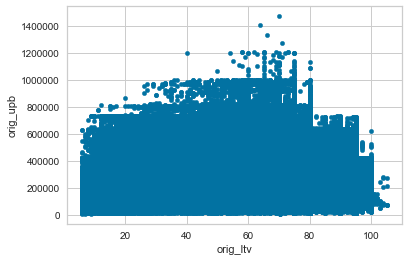

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.plot("orig_ltv", "orig_upb", kind= "scatter")

In [ ]:
df1.hist(column = ["credit_score","msa_code","mi_percent"])

In [9]:

dataset=df1
features = ['credit_score', 'mi_percent','property_type','borrower_cnt','orig_upb','orig_ltv']
target   = ['curr_ln_delq_stas_1yr']

X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


MemoryError: 

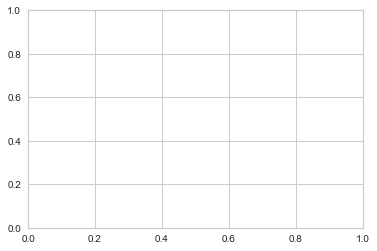

In [10]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [ ]:
dataset=df1
features = ['credit_score', 'mi_percent','property_type']
target   = ['borrower_cnt']

X = dataset[features]
y = dataset[target]

In [ ]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y.ravel(), **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto') 
]

for model in models:
    score_model(X, y, model)


In [ ]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto')
]

for model in models:
    score_model(X, y, model)
    
    

In [ ]:
# Try them all!

models = [
    SVC(gamma='auto'),  LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

In [ ]:
df1.dtypes

In [ ]:
sns.lmplot(x = "credit_score", y = "orig_int_rate", data=df1 )    

In [ ]:
sns.lmplot(y="orig_upb", x="orig_ltv", data=df1, fit_reg=False, hue="occupancy_status")

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x="occupancy_status", y="orig_upb", data=df1)

In [ ]:
sns.distplot(df1["orig_ltv"])

In [ ]:
sns.jointplot(df1["orig_upb"], df1["orig_ltv"])

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")